In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rotation(p, c, cost, sint):
    deltax = (p[0] - c[0])
    deltay = (p[1] - c[1])
    return cost * deltax - sint * deltay + c[0], sint * deltax + cost * deltay + c[1]

def makeCardinals(rotAngle):
    if (rotAngle + 2 * np.pi) % (2 * np.pi) < np.pi / 2.0:
        return {'south' : 0, 'west' : 1, 'north' : 2, 'east' : 3}
    elif (rotAngle + 2 * np.pi) % (2 * np.pi) < np.pi:
        return {'south' : 1, 'west' : 2, 'north' : 3, 'east' : 0}
    elif (rotAngle + 2 * np.pi) % (2 * np.pi) < 3 * np.pi / 2.0:
        return {'south' : 2, 'west' : 3, 'north' : 0, 'east' : 1}
    else:
        return {'south' : 3, 'west' : 0, 'north' : 1, 'east' : 2}

In [13]:
nPxX = 50
nPxY = 70
norm = np.zeros(nPxX * nPxY)
rotCenter = [25, 35]
rotAngle = np.pi / 6.0
cosRot = np.cos(rotAngle)
sinRot = np.sin(rotAngle)

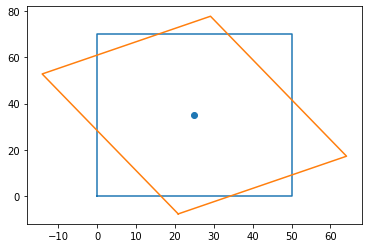

In [14]:
points = np.array([[0, 0, nPxX, nPxX, 0], [0, nPxY, nPxY, 0, 0]]).T
rotPoints = np.array([rotation(p, rotCenter, cosRot, sinRot) for p in points])

plt.plot(points[:,0], points[:,1])
plt.plot(rotPoints[:,0], rotPoints[:,1])
plt.scatter(rotCenter[0], rotCenter[1])

In [15]:
rotPoints

array([[ 20.84936491,  -7.81088913],
       [-14.15063509,  52.81088913],
       [ 29.15063509,  77.81088913],
       [ 64.15063509,  17.18911087],
       [ 20.84936491,  -7.81088913]])

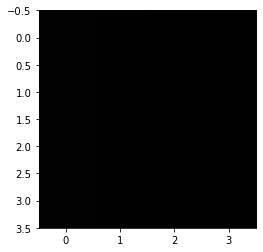

In [8]:
colors = np.ones((nPxY, nPxX)) * np.linspace(0.99,1,nPxX)[np.newaxis,:]
plt.imshow(colors, cmap='Greys', vmin=0, vmax=1)

In [16]:
cardinals = makeCardinals(rotAngle)
newOrigin = np.array([rotPoints[cardinals['west']][0], rotPoints[cardinals['south']][1]])
newNPxX = int(np.ceil(rotPoints[cardinals['east']][0] - rotPoints[cardinals['west']][0])) + 1
newNPxY = int(np.ceil(rotPoints[cardinals['north']][1] - rotPoints[cardinals['south']][1])) + 1
print(newOrigin, newNPxX, newNPxY)

[-14.15063509  -7.81088913] 80 87


In [19]:
newOrigin

array([-14.15063509,  -7.81088913])

In [18]:
newColors = np.zeros((newNPxY, newNPxX))

cornersList = []
versorX, versorY = np.array([cosRot, sinRot]), np.array([-sinRot, cosRot])
vec0, vec1, vec2, vec3 = np.array([-0.5, -0.5]), np.array([-0.5, 0.5]), np.array([0.5, 0.5]), np.array([0.5, -0.5])
for i in range(nPxY):
    for j in range(nPxX):
        center = rotPoints[0] + (j + 0.5) * versorX + (i + 0.5) * versorY - newOrigin
        cornersList.append(np.array([center + vec0, center + vec1, center + vec2, center + vec3]) + newOrigin)
        
        p = (center + vec0) 
        newJ, newI = int(p[0]), int(p[1])
        print((newJ + 1 - p[0]),(newI + 1 - p[1]), newJ, newI)
        newColors[newI, newJ] += colors[i, j] * (newJ + 1 - p[0]) * (newI + 1 - p[1])

        p = (center + vec1) 
        newJ, newI = int(p[0]), int(p[1])
        print(newJ + 1 - p[0], p[1] - newI, newJ, newI)
        newColors[newI, newJ] += colors[i, j] * (newJ + 1 - p[0]) * (p[1] - newI)
        
        p = (center + vec2) 
        newJ, newI = int(p[0]), int(p[1])
        print( p[0] - newJ, p[1] - newI, newJ, newI)
        newColors[newI, newJ] += colors[i, j] * (p[0] - newJ) * (p[1] - newI)
        
        p = (center + vec3) 
        newJ, newI = int(p[0]), int(p[1])
        print(p[0] - newJ, newI + 1 - p[1], newJ, newI)
        newColors[newI, newJ] += colors[i, j] * (p[0] - newJ) * (newI + 1 - p[1])
        
        print()
        
cornersList = np.array(cornersList).reshape((int(len(cornersList) * len(cornersList[0])),2))

0.31698729810779014 0.8169872981077804 34 0
0.31698729810779014 0.18301270189221963 34 1
0.6830127018922099 0.18301270189221963 35 1
0.6830127018922099 0.8169872981077804 35 0

0.4509618943233562 0.31698729810778037 35 0
0.4509618943233562 0.6830127018922196 35 1
0.5490381056766438 0.6830127018922196 36 1
0.5490381056766438 0.31698729810778037 36 0

0.5849364905389152 0.8169872981077804 36 1
0.5849364905389152 0.18301270189221963 36 2
0.41506350946108483 0.18301270189221963 37 2
0.41506350946108483 0.8169872981077804 37 1

0.7189110867544741 0.31698729810778037 37 1
0.7189110867544741 0.6830127018922196 37 2
0.2810889132455259 0.6830127018922196 38 2
0.2810889132455259 0.31698729810778037 38 1

0.8528856829700402 0.8169872981077804 38 2


IndexError: index 4 is out of bounds for axis 1 with size 4

In [211]:
newColors[0, 1]

0.0

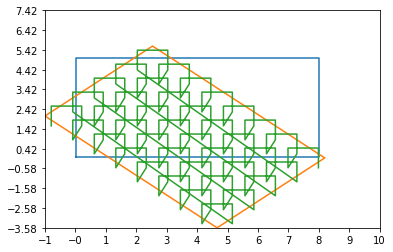

In [212]:

plt.xlim([newOrigin[0], newOrigin[0] + newNPxX])
plt.ylim([newOrigin[1], newOrigin[1] + newNPxY])
plt.xticks(np.arange(newNPxX+1) + newOrigin[0])
plt.yticks(np.arange(newNPxY+1) + newOrigin[1])

plt.plot(points[:,0], points[:,1])
plt.plot(rotPoints[:,0], rotPoints[:,1])
#plt.scatter(newPxCenters[:,0], newPxCenters[:,1])
plt.plot(cornersList[:,0], cornersList[:,1])

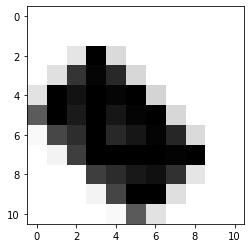

In [213]:
plt.imshow(newColors[::-1], cmap='Greys', vmin=0, vmax=1)

In [146]:
newColors[0,1]

8.79296635503124e-16